# Interpolation functions

## Junior mentor:

Y. Fabian Bautista

## Objectives of the tutorial
1. Differentiate between interpolating functions and curve fitting 
2. Create 1-D interpolations
3. Identify the diferente types of 1-D interpolating functions


### Curve fitting


In Tutorial 2 part a, we learned that fitting a curve to a set of data means to find the curve that better describes most of the data points. However, the fitted curve does not passes  throught all of data points.

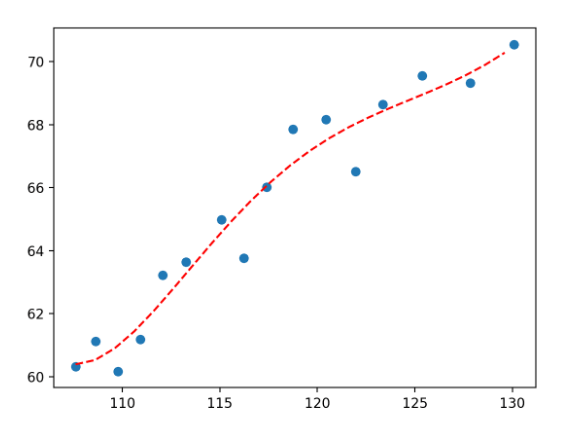

### Interpolation

Given a set of data points $(x_i,f_i)$, with $x_{min} \le x_i\le x_{max}$, an interpolation function $ f(x)$ is a curve that passes throught all of the data points available in the data set. Once we have found the interpolation functions,  we can evaluate it at different locations $f(x')$, with $x_{min} \le x'\le x_{max}$,  i.e. it can only be evaluated in the iterval $[x_{min}, x_{max}]$

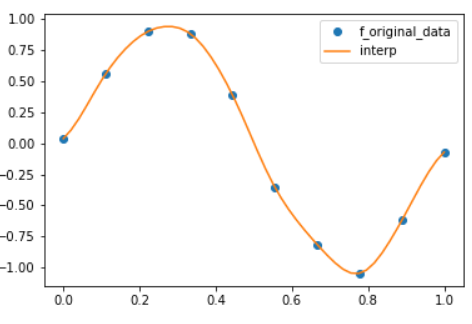

# Example 1: Basic 1-D interpolation

For this example we use the function <code>interp1d </code>, contained inside the  <code> scipy.interpolate </code>  <a https="https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d"> library </a>

In [1]:
import numpy as np # For maths
from scipy.interpolate import interp1d # For 1-D interpolations
import matplotlib.pyplot as plt # For ploting

### 1. Let us create some data points

In [2]:
x = np.linspace(0,10,15)
y = np.exp(-x/2)

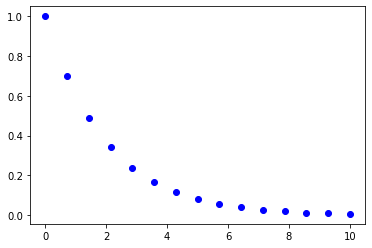

In [3]:
#py.figure(1)
#py.clf()
plt.plot(x,y,"bo")
plt.show()

### 2. Do the interpolation

In [4]:
interp1d?

In [5]:
f = interp1d(x,y)

Let us generate a diferent set of x-values

In [6]:
xnew = np.linspace(0,10, 8)

Plot the interpolating function

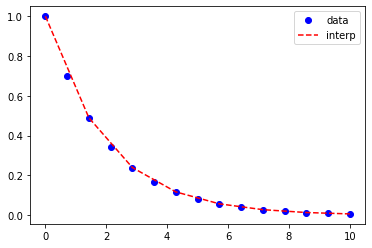

In [7]:
plt.plot(x,y,'bo',label = "data")
plt.plot(xnew,f(xnew),'r--',label = "interp")
plt.legend(loc = "upper right")
plt.show()

In [8]:
py.legend?

Object `py.legend` not found.


# Types of 1-D interpolating functions

The default value for <code>kind</code> of interpolation is <code>"linear" </code>

In [9]:
interp1d?

Let us see the effect of the different types of interpolating functions 

### Create our data

In [10]:
x1 = np.linspace(0,10,11)
y1 = np.sin(x1) 
x1new = np.linspace(0,10,100) #New data to evaluate after the  interpolation is done


<IPython.core.display.Javascript object>


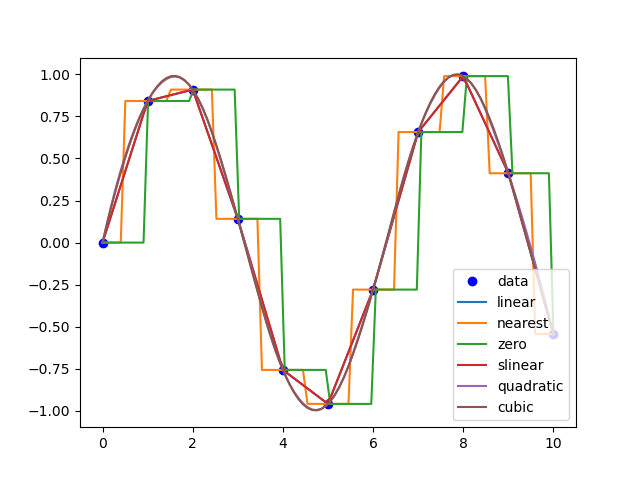

In [11]:
%matplotlib notebook
plt.plot(x1,y1,"bo",label = "data")
# Let us now do the interpolation for all the different kinds 
type_interp = ['linear', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic']
for kind in type_interp:
    f1 = interp1d(x1,y1,kind = kind)
    ynew = f1(x1new)
    plt.plot(x1new,ynew,label = kind)
plt.legend(loc = 'lower right')  
plt.show()

# Excercise

Use interpolating functions to complete the tutorial on curve fiting. Do an interpolation of the baryon velocity, and substract it in quadrature from the measured velocity. 